<a href="https://colab.research.google.com/github/ranjancodehub/learn/blob/master/Yolov8_medicinal_plants_train_on_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun Sep 17 09:05:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/HACKATHON/KAGGLE/PLANTS

/content/drive/MyDrive/HACKATHON/KAGGLE/PLANTS


In [ ]:
!ls

'labelled leaf.v1i.yolov8'
 Yolov8_medicinal_plants_train_on_custom_datasets.ipynb


In [ ]:
%cd /content/drive/MyDrive/HACKATHON/KAGGLE/PLANTS

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=100 imgsz=640 plots=True

/content/drive/MyDrive/HACKATHON/KAGGLE/PLANTS
100% 21.5M/21.5M [00:00<00:00, 136MB/s] 
Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None

In [ ]:
!ls runs/detect/train

args.yaml					    train_batch10710.jpg
confusion_matrix_normalized.png			    train_batch10711.jpg
confusion_matrix.png				    train_batch10712.jpg
events.out.tfevents.1694942089.c8e086c5bfee.2985.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


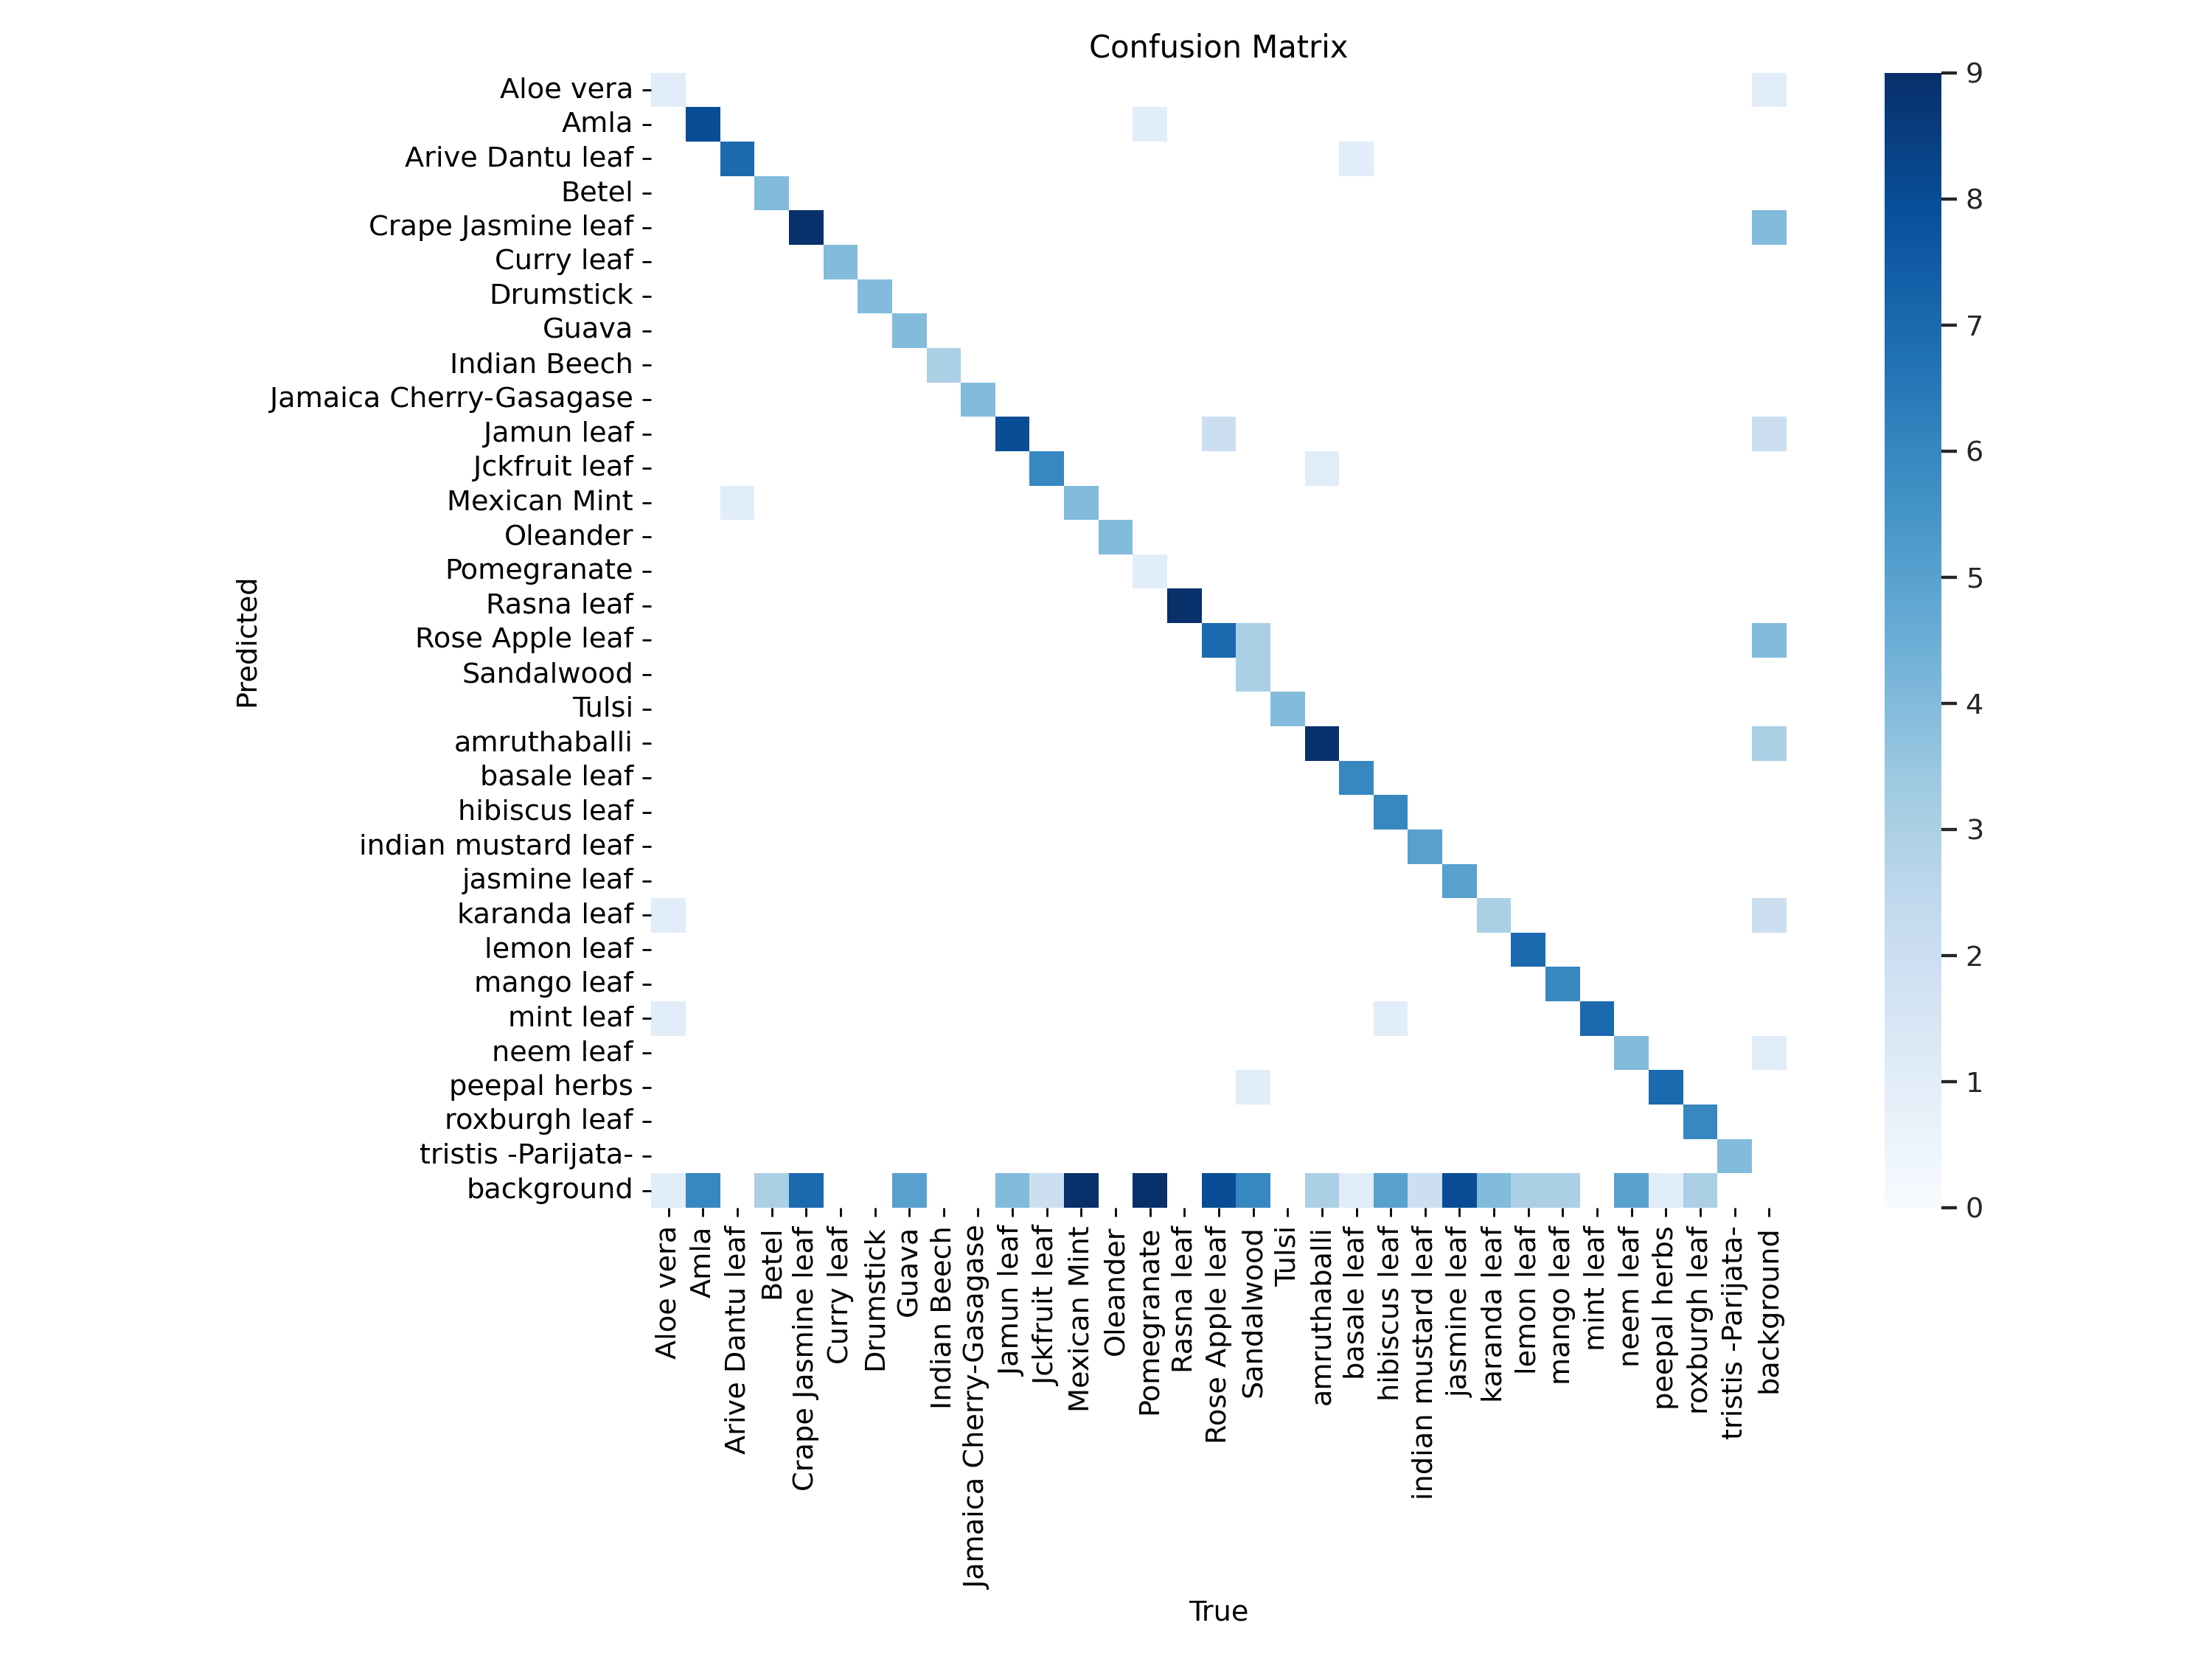

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

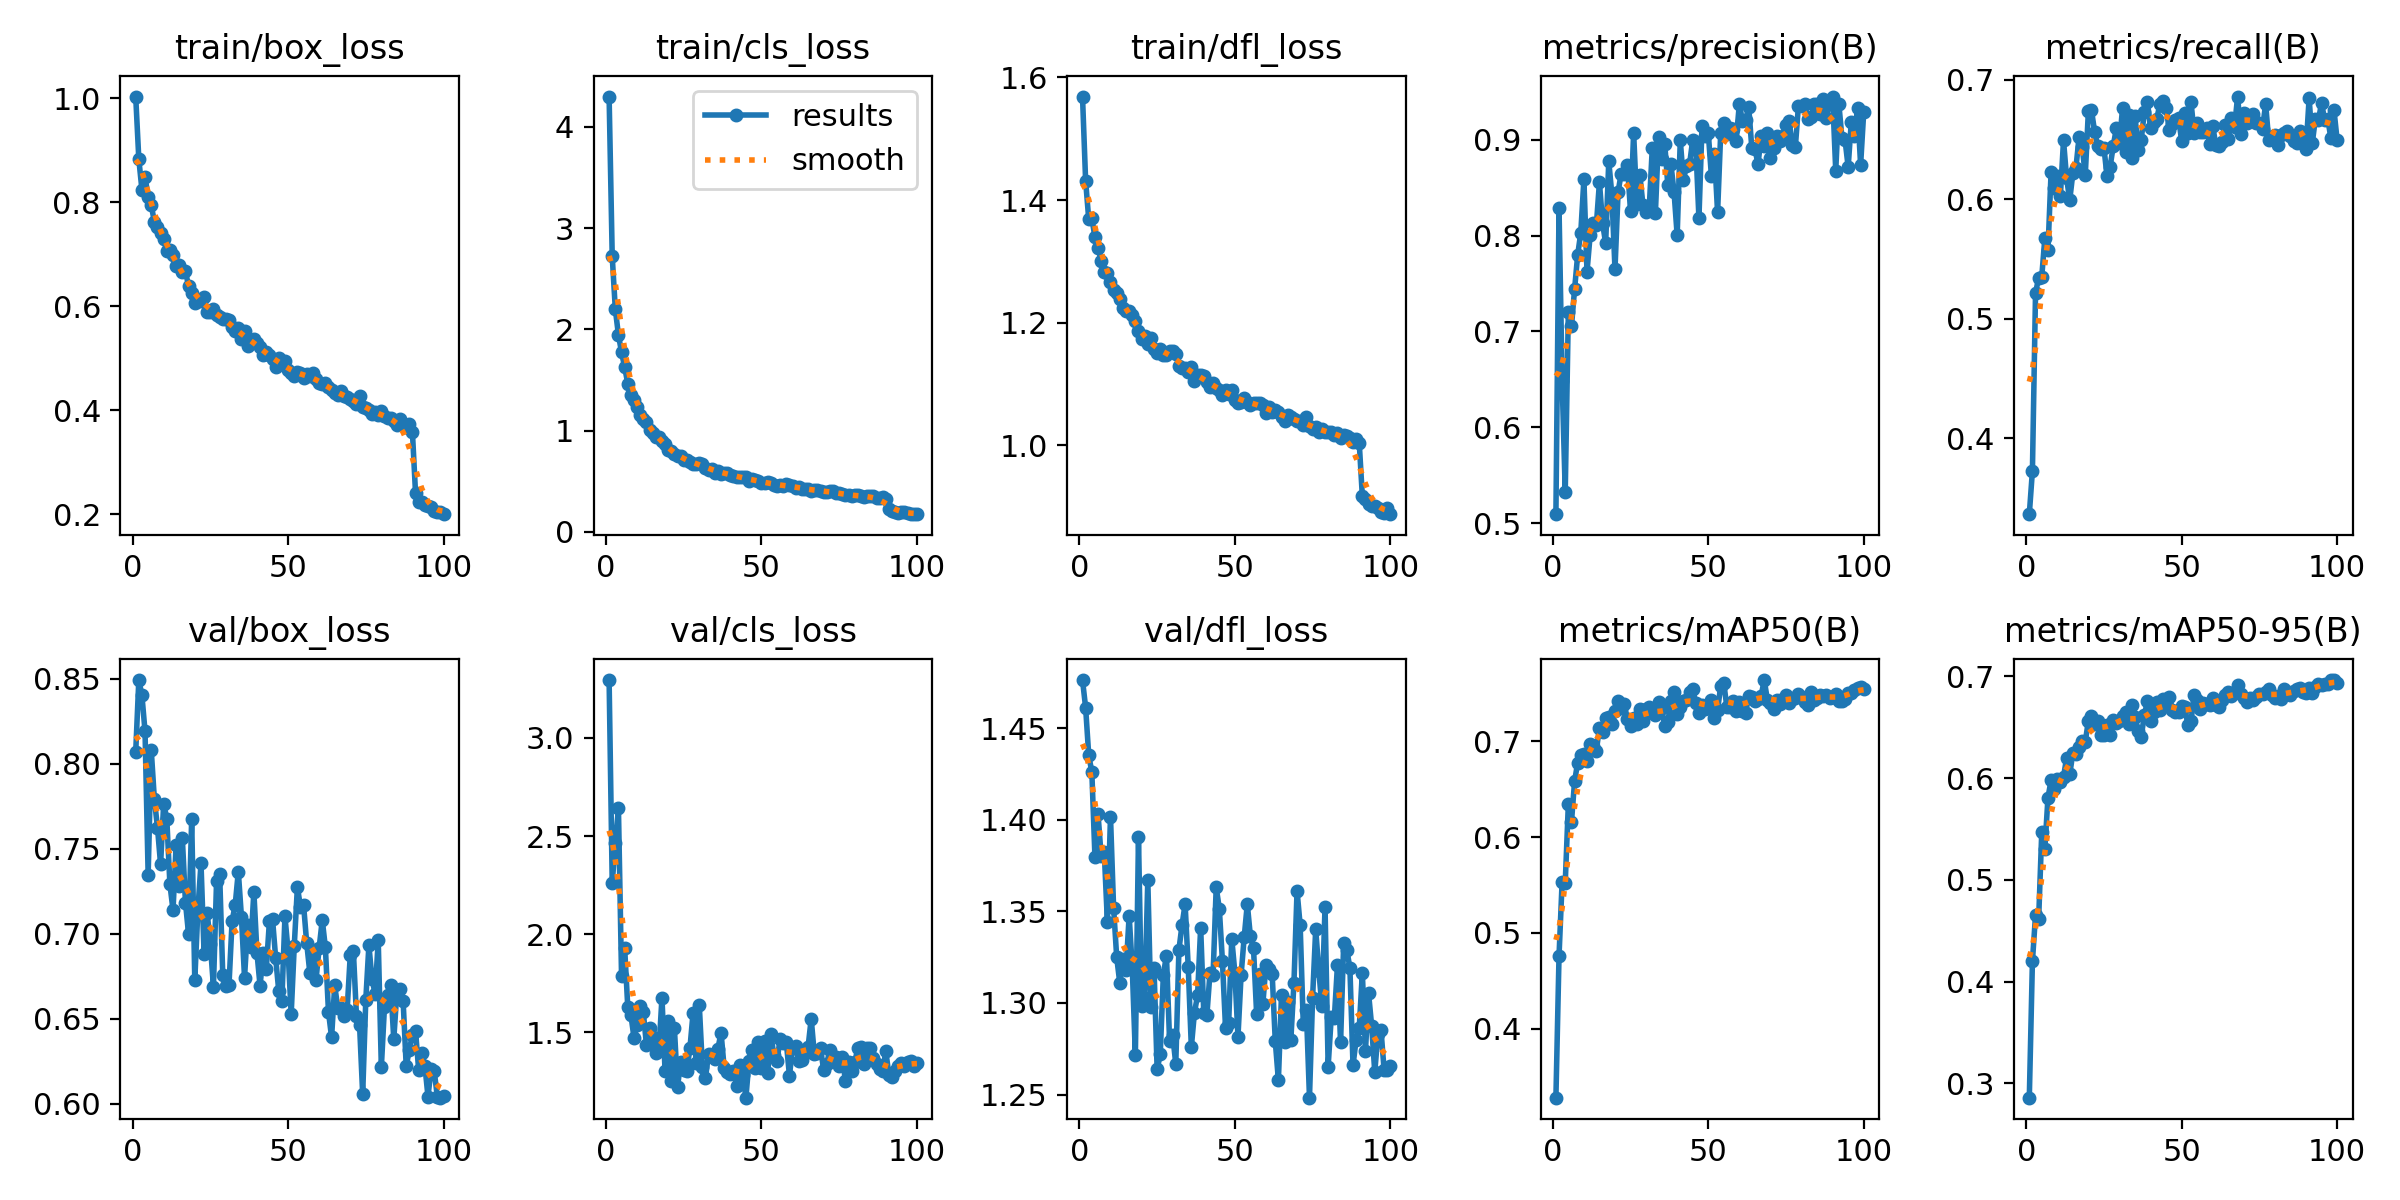

In [ ]:

Image(filename='runs/detect/train/results.png', width=600)

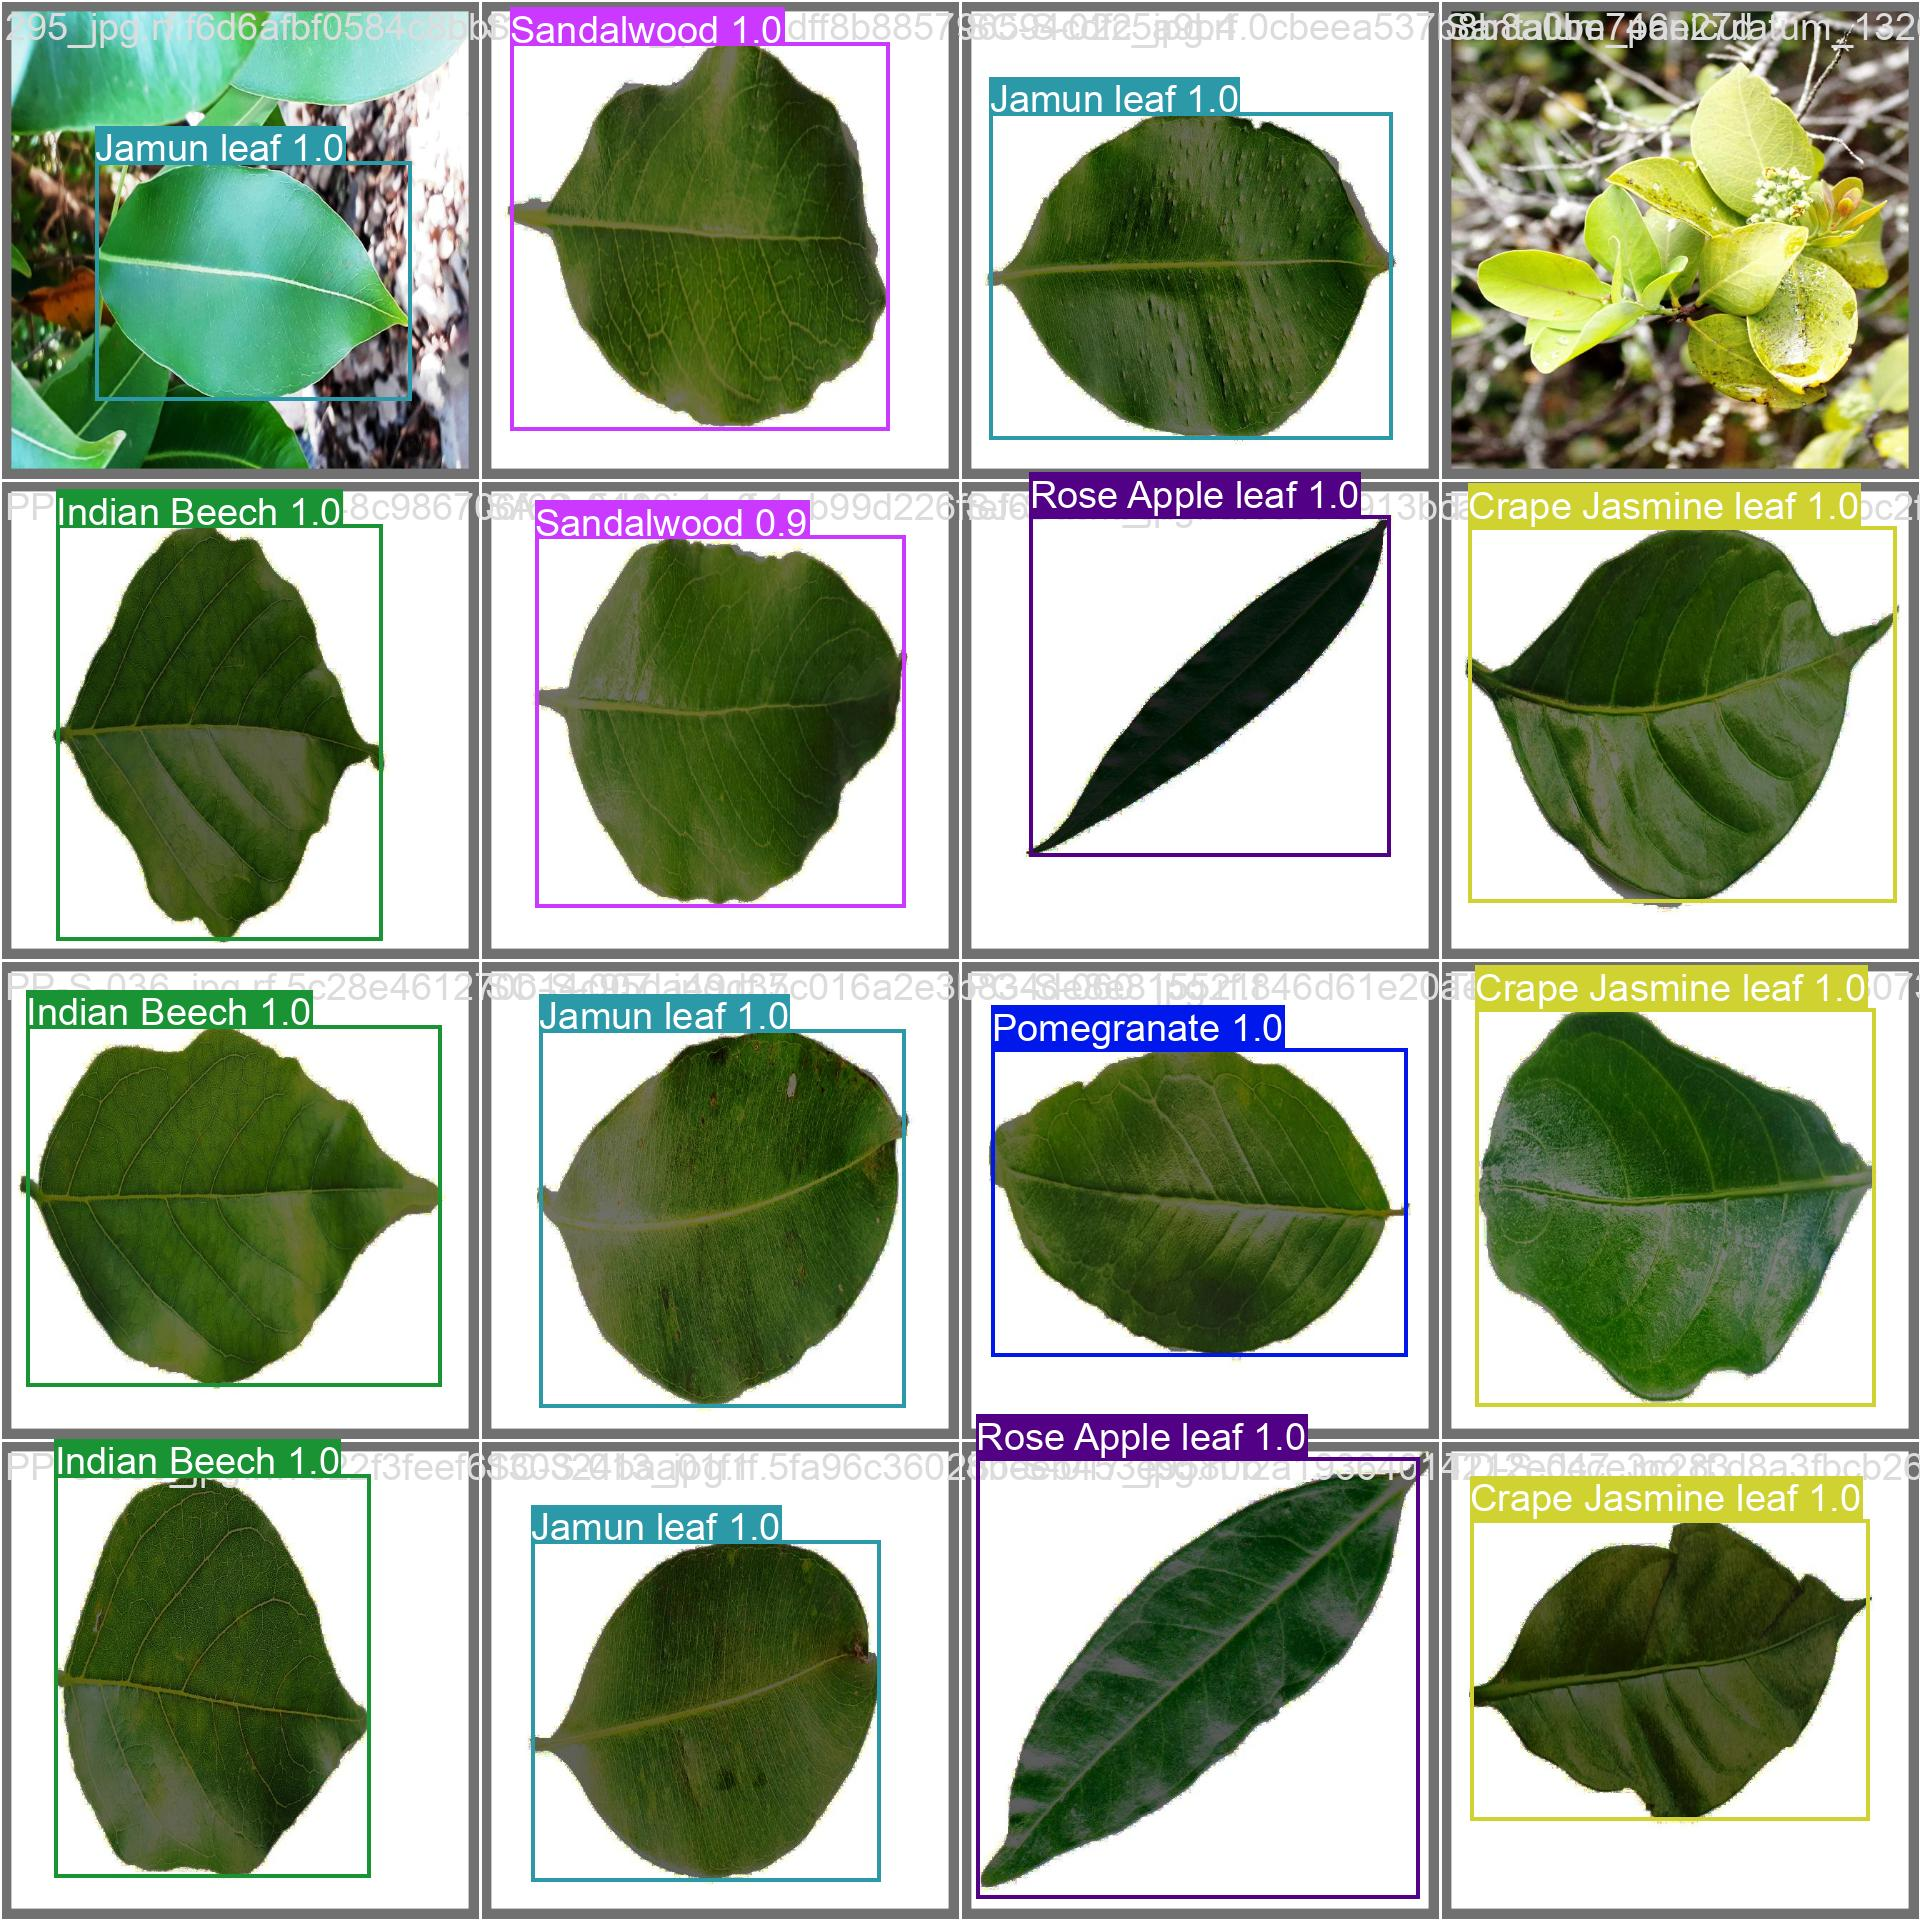

In [ ]:

Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11137968 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/HACKATHON/KAGGLE/PLANTS/labelled leaf.v1i.yolov8/valid/labels.cache... 194 images, 0 backgrounds, 0 corrupt: 100% 194/194 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 223, len(boxes) = 280. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:06<00:00,  1.95it/s]
                   all        194        280      0.874      0.674      0.756      0.697
             Aloe vera        194          4          1       0.52      0.777      0.589
                  Amla        194         14      0.933      0.571      0.681      0.625
   

In [ ]:
!ls runs/detect/val

confusion_matrix_normalized.png  PR_curve.png		val_batch1_labels.jpg
confusion_matrix.png		 R_curve.png		val_batch1_pred.jpg
F1_curve.png			 val_batch0_labels.jpg	val_batch2_labels.jpg
P_curve.png			 val_batch0_pred.jpg	val_batch2_pred.jpg


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/HACKATHON/KAGGLE/PLANTS/labelled_leaf.v1i.yolov8/test/images save=True

Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11137968 parameters, 0 gradients

image 1/139 /content/drive/MyDrive/HACKATHON/KAGGLE/PLANTS/labelled_leaf.v1i.yolov8/test/images/360_F_305214668_dFp58KHzIMTYg1VcitWenfPUUejrGhej_jpg.rf.61e3476e139cf003d816b638028acde9.jpg: 640x640 (no detections), 16.4ms
image 2/139 /content/drive/MyDrive/HACKATHON/KAGGLE/PLANTS/labelled_leaf.v1i.yolov8/test/images/382_jpg.rf.b1266fec1e4e5c172c7c7d763212ba06.jpg: 640x640 1 Amla, 16.4ms
image 3/139 /content/drive/MyDrive/HACKATHON/KAGGLE/PLANTS/labelled_leaf.v1i.yolov8/test/images/394_jpg.rf.6bed26b9b55194edfd3480316cf5dc63.jpg: 640x640 (no detections), 16.4ms
image 4/139 /content/drive/MyDrive/HACKATHON/KAGGLE/PLANTS/labelled_leaf.v1i.yolov8/test/images/480_jpg.rf.ec3436d2442387fd94e5f756d0b3a003.jpg: 640x640 1 Amla, 16.4ms
image 5/139 /content/drive/MyDrive/HACKATHON/KAGGLE/PLANTS/labelled_leaf.v1i.yolov8/test/images/496_jpg.rf.b

In [ ]:
!ls runs/detect/predict

360_F_305214668_dFp58KHzIMTYg1VcitWenfPUUejrGhej_jpg.rf.61e3476e139cf003d816b638028acde9.jpg
382_jpg.rf.b1266fec1e4e5c172c7c7d763212ba06.jpg
394_jpg.rf.6bed26b9b55194edfd3480316cf5dc63.jpg
480_jpg.rf.ec3436d2442387fd94e5f756d0b3a003.jpg
496_jpg.rf.b1b3632c72438c7bda3c64aed9dfe39d.jpg
514_jpg.rf.383242da84c35ddbdeec446f58e4eaa8.jpg
526_jpg.rf.97031cd2be036c4ec24d27d14541919f.jpg
80228f1e-c5cc-4cc0-906c-ed995c7fee59_jpg.rf.8ec410d1dbf7d4a5e674f19ba1652e4a.jpg
AG-S-003_jpg.rf.459eb1630bd3ad8e521f5e07a73bfecd.jpg
AG-S-008_jpg.rf.42f99f7bdbc4a0950ad4e10fd08379cb.jpg
AG-S-009_jpg.rf.57b34d80eaa6ffb5cf2ae36e54d7fd17.jpg
AG-S-011_jpg.rf.5d5139f30e4222ef7965316fa2eb8eb3.jpg
AG-S-014_jpg.rf.eeb50ec74ef108d3938ac04542e3f811.jpg
AG-S-030_jpg.rf.bd25c691741dce21e629ad6edeaf4bb4.jpg
AG-S-039_jpg.rf.6703999acc9d3a3c27e1369e054c9561.jpg
AG-S-044_jpg.rf.0693c8a60bb124e2a73f554be3d1f9a6.jpg
AG-S-045_jpg.rf.ae4c7a683c27920bc712b5f080a471f7.jpg
ah4_jpg.rf.67c1556fd7d20ea80801caf66f8c8189.jpg
ah5_jpg.rf.fa

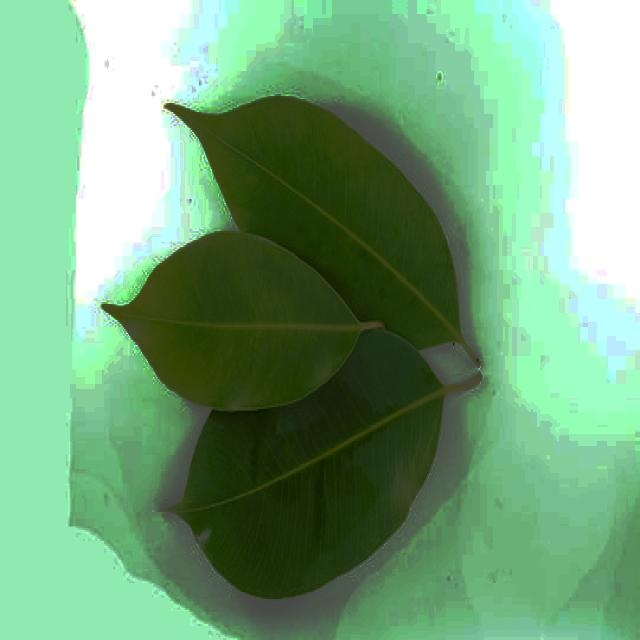

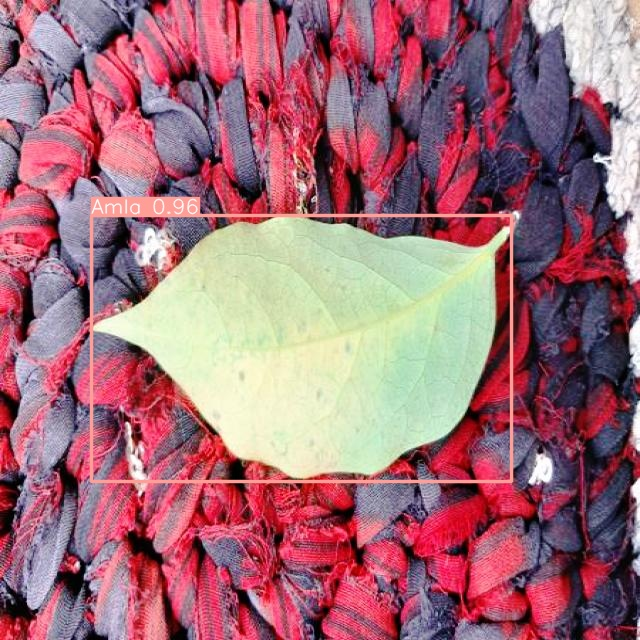

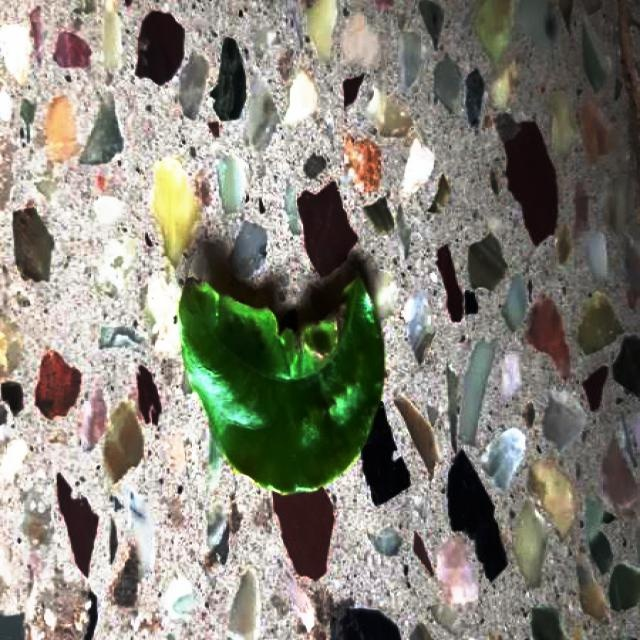

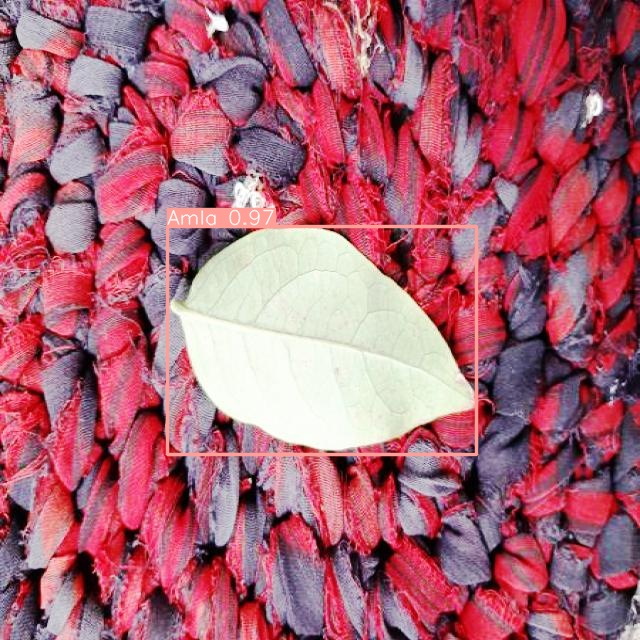

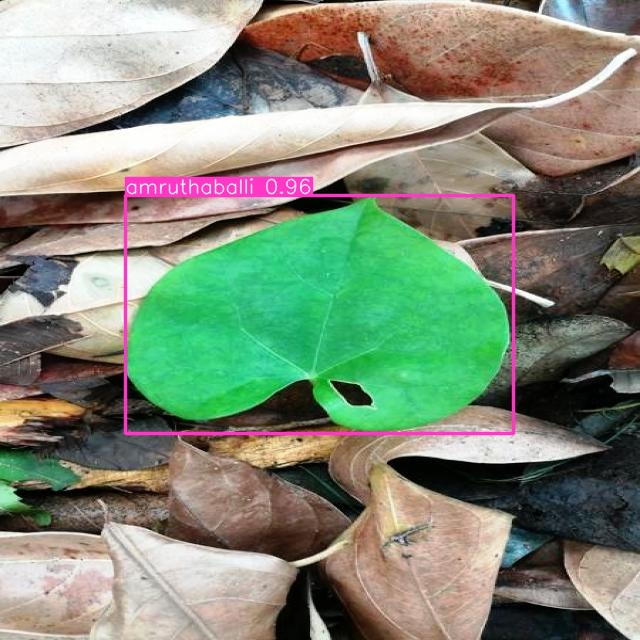

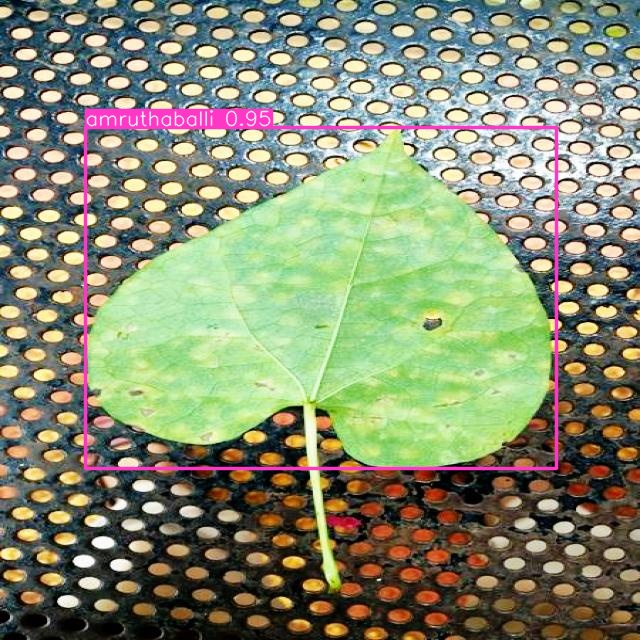

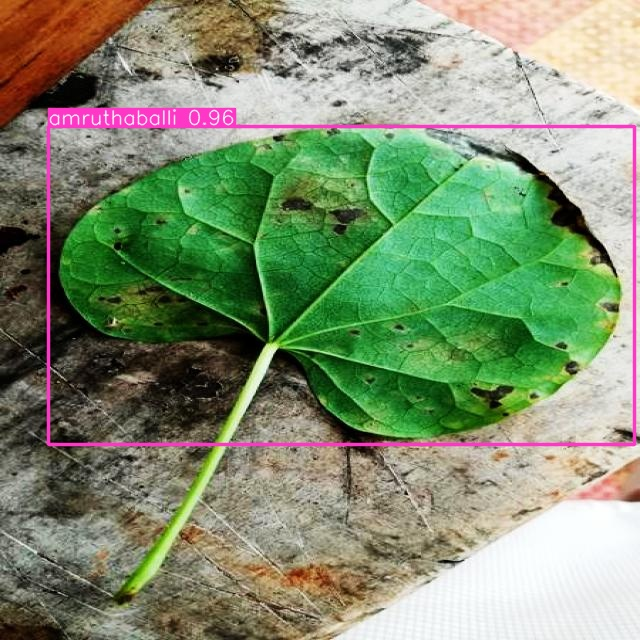

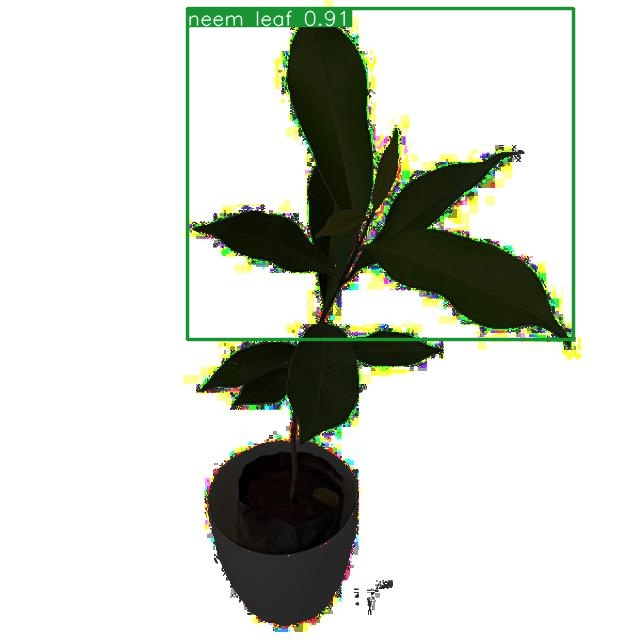

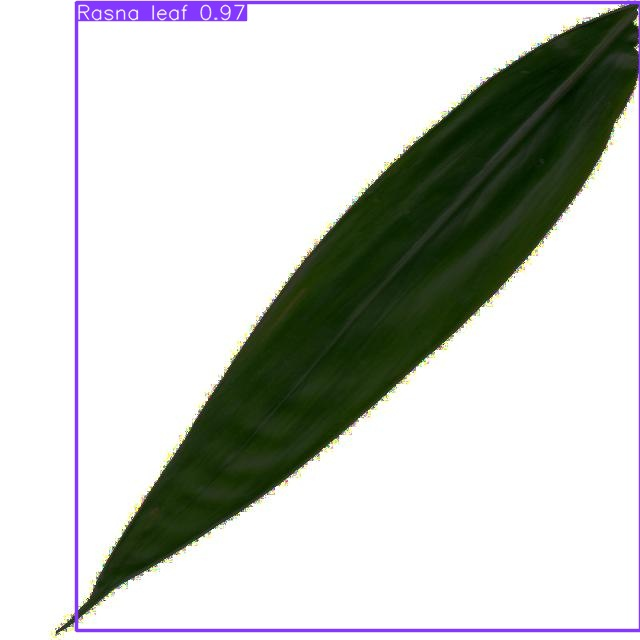

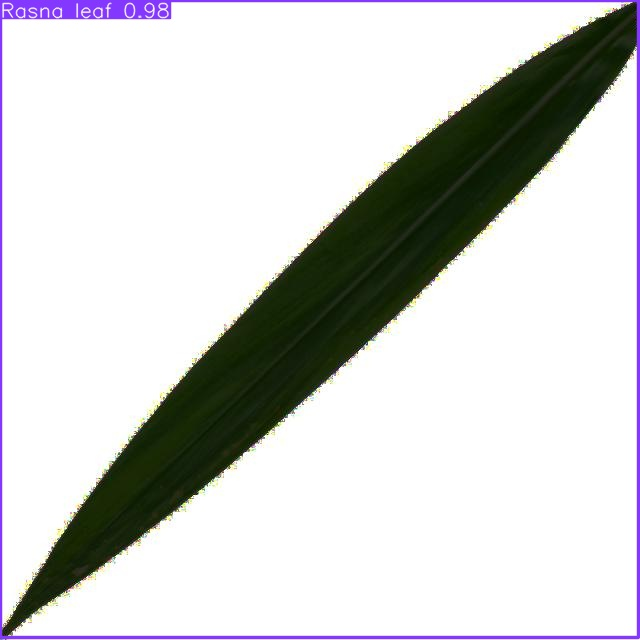

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")